In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

In [3]:
from sklearn.model_selection import train_test_split

X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

n_estimators = 100
random_state = 42

rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
xgb_model = XGBRegressor(n_estimators=n_estimators, random_state=random_state)

In [5]:
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [6]:
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Random Forest MSE: {mse_rf:.4f}, R^2: {r2_rf:.4f}")
print(f"XGBoost MSE: {mse_xgb:.4f}, R^2: {r2_xgb:.4f}")

Random Forest MSE: 0.2557, R^2: 0.8049
XGBoost MSE: 0.2226, R^2: 0.8301


Text(0, 0.5, 'Predicted Values')

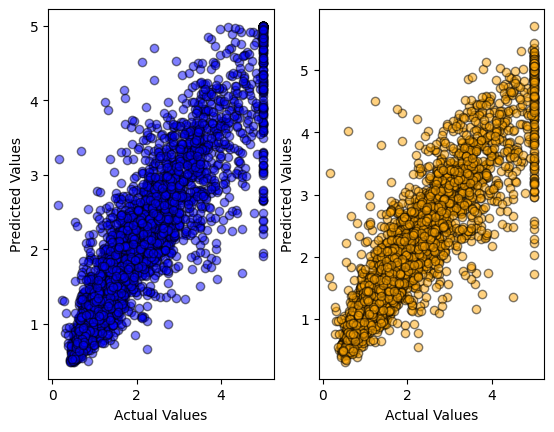

In [8]:
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="blue",ec='k')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color="orange",ec='k')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

In [9]:
residuals_rf = y_test - y_pred_rf
residuals_xgb = y_test - y_pred_xgb

Text(0, 0.5, 'Residuals')

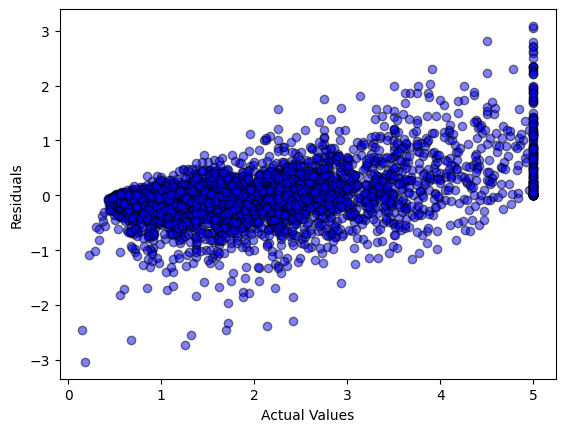

In [10]:
redsidual_df_rf = pd.DataFrame({"residuals": residuals_rf, "y_test": y_test})
redsidual_df_xgb = pd.DataFrame({"residuals": residuals_xgb, "y_test": y_test})

plt.scatter(redsidual_df_rf["y_test"], redsidual_df_rf["residuals"], alpha=0.5, color="blue",ec='k')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")

Text(0.5, 0, 'XGBoost Feature Importance')

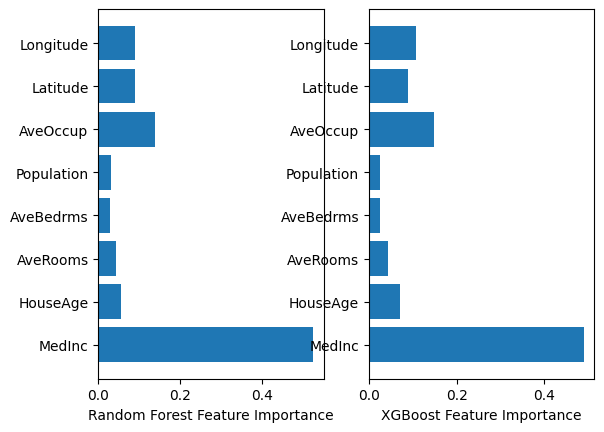

In [11]:
importaces_rf = rf_model.feature_importances_
importances_xgb = xgb_model.feature_importances_

plt.subplot(1, 2, 1)
plt.barh(data.feature_names, importaces_rf)
plt.xlabel("Random Forest Feature Importance")

plt.subplot(1, 2, 2)
plt.barh(data.feature_names, importances_xgb)
plt.xlabel("XGBoost Feature Importance")
